<a href="https://colab.research.google.com/github/Linda0319/Deepsolar/blob/main/deepsolar_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[](https://aifreeblog.herokuapp.com/posts/64/Data_Analytics_in_Practice_Titanic/)

## **上傳資料/DeepSolar套件**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from IPython.display import display
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ROUTE1 = '/content/drive/MyDrive/Colab Notebooks/deepsolar_tract.csv'
df = pd.read_csv(ROUTE1,sep=',',header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72537 entries, 0 to 72536
Columns: 169 entries, ID to avg_electricity_retail_rate
dtypes: bool(2), float64(117), int64(47), object(3)
memory usage: 92.6+ MB


In [ ]:
df.electricity_price_transportation = df.electricity_price_transportation.replace(r'\s', np.nan,regex=True)
df.electricity_price_transportation=df.electricity_price_transportation.astype(np.float64)
df.electricity_price_transportation

0         9.50
1         9.50
2         9.50
3         9.50
4         9.50
         ...  
72532    10.08
72533      NaN
72534      NaN
72535      NaN
72536     5.34
Name: electricity_price_transportation, Length: 72537, dtype: float64

In [ ]:
df.county.unique()

array(['Stearns County', 'Orange County', 'Los Angeles County', ...,
       'Hemphill County', 'Taliaferro County', 'Love County'],
      dtype=object)

In [ ]:
null_count = (np.sum(df.isnull()) /df.shape[0]).sort_values(ascending=False)[0:10]
null_count

electricity_price_transportation    0.164040
voting_2012_dem_percentage          0.145498
voting_2012_gop_percentage          0.145498
heating_degree_days                 0.079987
earth_temperature_amplitude         0.079987
cooling_degree_days                 0.079987
earth_temperature                   0.079987
wind_speed                          0.079987
atmospheric_pressure                0.079987
daily_solar_radiation               0.079987
dtype: float64

In [ ]:
df_clean = df.dropna()
null_count1 = (np.sum(df_clean.isnull()) /df_clean.shape[0]).sort_values(ascending=False)[0:10]
null_count1

avg_electricity_retail_rate                0.0
race_asian_rate                            0.0
heating_fuel_fuel_oil_kerosene_rate        0.0
heating_fuel_electricity_rate              0.0
heating_fuel_gas_rate                      0.0
poverty_family_below_poverty_level_rate    0.0
employ_rate                                0.0
race_two_more_rate                         0.0
race_other_rate                            0.0
race_islander_rate                         0.0
dtype: float64

In [ ]:
drop_columns=['county','state','voting_2016_dem_win','voting_2012_dem_win','ID','solar_panel_area_divided_by_area',
         'tile_count','tile_count_residential','tile_count_nonresidential','solar_system_count','total_panel_area',
         'fips','solar_panel_area_per_capita','solar_system_count_residential',
         'solar_system_count_nonresidential','number_of_solar_system_per_household','total_panel_area_nonresidential',
         'heating_fuel_solar_rate','heating_fuel_solar']
df_area = df_clean.drop(drop_columns,axis=1)
df_area.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45179 entries, 0 to 72536
Columns: 150 entries, average_household_income to avg_electricity_retail_rate
dtypes: float64(106), int64(44)
memory usage: 52.0 MB


In [ ]:
df_y = df_clean['total_panel_area_residential']
df_y.describe()

count    45179.000000
mean       546.550595
std       1509.026315
min          0.000000
25%          5.940687
50%         65.938532
75%        366.094661
max      40380.099851
Name: total_panel_area_residential, dtype: float64

In [ ]:
df_area = df_area.apply(lambda x: (x - x.min()) / (x.max() - x.min())*0.6+0.2)

In [ ]:
df_x = df_area.drop(['total_panel_area_residential'],axis=1)

In [ ]:
X = df_x
Y = df_area['total_panel_area_residential']
print(X.shape)
print(Y.shape)

(45179, 149)
(45179,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(30269, 149)
(14910, 149)
(30269,)
(14910,)


# LR

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

#print('Linear Regression coefficients: {}'.format(lm.coef_)) #各feature的coef
print('Linear Regression intercept: {}'.format(lr.intercept_)) #-1812468440.9355044

Linear Regression intercept: -1812468440.9355044


In [ ]:
def lr_plot(Y,y_pred):
  fig= plt.subplots(figsize=(5,5)) 
  sns.scatterplot(Y, y_pred, alpha=0.4)
  sns.regplot(Y, y_pred, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2})
  
  plt.xlabel("Actual area: $Y_i$")
  plt.ylabel("Predicted area: $\hat{Y}_i$")
  plt.title("Actual area vs Predicted area: $Y_i$ vs $\hat{Y}_i$")
  return plt.show()

In [ ]:
def metrics(Y,y_pred):
    r2 = r2_score(Y,y_pred)
    rmse = (np.sqrt(mean_squared_error(Y,y_pred)))
    print('r-squared: {}{}'.format(r2*100,'%'))
    print('---------------------------------------')
    print('root mean squared error: {}'.format(rmse))

In [ ]:
def accu_rate(Y,y_pred):
  errth = (abs(Y-y_pred))/Y
  df_errth = errth.to_frame('errth')
  [t1,t2,t3] = [0.01,0.05,0.1] #threshold， 

  count1 = 0
  for i in df_errth.errth:
    if i < float(t1):
      count1 = count1+1
  r1 = count1/len(df_errth)*100

  count2 = 0
  for i in df_errth.errth:
    if i < float(t2):
      count2 = count2+1
  r2 = count2/len(df_errth)*100

  count3 = 0
  for i in df_errth.errth:
    if i < float(t3):
      count3 = count3+1
  r3 = count3/len(df_errth)*100

  print('when threshold {} accuracy rate: {}%'.format(t1,r1))
  print('when threshold {} accuracy rate: {}%'.format(t2,r2))
  print('when threshold {} accuracy rate: {}%'.format(t3,r3))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


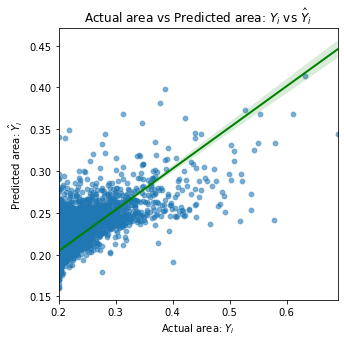

In [ ]:
y_lrtrain_pred = lr.predict(X_train)
lr_plot(Y_train,y_lrtrain_pred)

In [ ]:
metrics(Y_train,y_lrtrain_pred)

r-squared: 49.355803031236874%
---------------------------------------
root mean squared error: 0.015823818214063593


In [ ]:
accu_rate(Y_train,y_lrtrain_pred)

when threshold 0.01 accuracy rate: 24.65228451551092%
when threshold 0.05 accuracy rate: 77.55789751891375%
when threshold 0.1 accuracy rate: 93.77911394496019%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


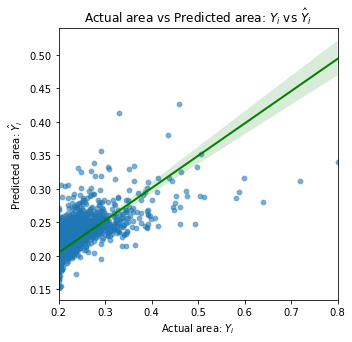

In [ ]:
y_lrtest_pred = lr.predict(X_test)
lr_plot(Y_test,y_lrtest_pred)

In [ ]:
metrics(Y_test,y_lrtest_pred)

r-squared: 47.33711070250344%
---------------------------------------
root mean squared error: 0.016542947490692284


In [ ]:
accu_rate(Y_test,y_lrtest_pred)

when threshold 0.01 accuracy rate: 24.728370221327967%
when threshold 0.05 accuracy rate: 77.63246143527833%
when threshold 0.1 accuracy rate: 93.37357478202549%


# DNN

In [ ]:
from sklearn.neural_network import MLPRegressor

dnn=MLPRegressor(hidden_layer_sizes=(80,80,80),
         activation='relu',
         solver='adam', 
         batch_size=100,
         learning_rate='constant', 
         learning_rate_init=0.01,
         power_t=0.5,    
         max_iter=1000,   
         shuffle=True,    
         random_state=1,  
         momentum=0.9)

In [ ]:
dnn.fit(X_train, Y_train)
y_dnntrain_pred=dnn.predict(X_train)
y_dnntrain_pred

array([0.20089247, 0.20127847, 0.2005351 , ..., 0.20066376, 0.20101926,
       0.20091311])

In [ ]:
metrics(Y_train,y_dnntrain_pred)

r-squared: 43.20732900164723%
---------------------------------------
root mean squared error: 0.016756857931108666


In [ ]:
accu_rate(Y_train,y_dnntrain_pred)

when threshold 0.01 accuracy rate: 68.5024282268988%
when threshold 0.05 accuracy rate: 87.33687931547126%
when threshold 0.1 accuracy rate: 93.69321748323367%


In [ ]:
y_dnntest_pred=dnn.predict(X_test)
y_dnntest_pred

array([0.20097086, 0.20094368, 0.2010214 , ..., 0.20166421, 0.20215641,
       0.22667792])

In [ ]:
metrics(Y_test,y_dnntest_pred)

r-squared: 41.56213099285833%
---------------------------------------
root mean squared error: 0.017426402278653188


In [ ]:
accu_rate(Y_test,y_dnntest_pred)

when threshold 0.01 accuracy rate: 68.16901408450704%
when threshold 0.05 accuracy rate: 87.458081824279%
when threshold 0.1 accuracy rate: 93.75586854460094%


# ExtraTrees



In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor
reg = BaggingRegressor(extra_tree, random_state=0).fit(X_train, Y_train)

In [ ]:
y_bagtrain_pred=bag.predict(X_train)
y_bagtrain_pred

array([0.20029019, 0.20087936, 0.20040306, ..., 0.20016848, 0.20132937,
       0.20024455])

In [ ]:
metrics(Y_train,y_bagtrain_pred)

r-squared: 94.05098570895728%
---------------------------------------
root mean squared error: 0.005423366405072792


In [ ]:
accu_rate(Y_train,y_bagtrain_pred)

when threshold 0.01 accuracy rate: 82.40113647626285%
when threshold 0.05 accuracy rate: 97.22818725428657%
when threshold 0.1 accuracy rate: 99.3425616967855%


In [ ]:
y_bagtest_pred=bag.predict(X_test)
y_bagtest_pred

array([0.20107311, 0.20121695, 0.20058   , ..., 0.2008388 , 0.23339015,
       0.25364393])

In [ ]:
metrics(Y_test,y_bagtest_pred)

r-squared: 67.2160796371867%
---------------------------------------
root mean squared error: 0.013052418586408897


In [ ]:
accu_rate(Y_test,y_bagtest_pred)

when threshold 0.01 accuracy rate: 67.02213279678068%
when threshold 0.05 accuracy rate: 90.19450033534541%
when threshold 0.1 accuracy rate: 96.0898725687458%


# XGBoost

In [ ]:
from xgboost import XGBRegressor
xgbc = XGBRegressor(objective ='reg:linear', verbosity = 0, random_state=42)
xgbc.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [ ]:
y_xgbctrain_pred=xgbc.predict(X_train)
y_xgbctrain_pred

array([0.20023787, 0.20133826, 0.19958097, ..., 0.19925374, 0.20062393,
       0.20342839], dtype=float32)

In [ ]:
metrics(Y_train,y_xgbctrain_pred)

r-squared: 76.58229966947133%
---------------------------------------
root mean squared error: 0.010760155870770779


In [ ]:
accu_rate(Y_train,y_xgbctrain_pred)

when threshold 0.01 accuracy rate: 60.50744986619975%
when threshold 0.05 accuracy rate: 90.20119594304404%
when threshold 0.1 accuracy rate: 96.74254187452509%


In [ ]:
y_xgbctest_pred=xgbc.predict(X_test)
y_xgbctest_pred

array([0.2018637 , 0.20404738, 0.20320168, ..., 0.20410201, 0.21353409,
       0.2509899 ], dtype=float32)

In [ ]:
metrics(Y_test,y_xgbctest_pred)

r-squared: 68.17019733128411%
---------------------------------------
root mean squared error: 0.012861082468860538


In [ ]:
accu_rate(Y_test,y_xgbctest_pred)

when threshold 0.01 accuracy rate: 60.389000670690805%
when threshold 0.05 accuracy rate: 89.83903420523139%
when threshold 0.1 accuracy rate: 96.31790744466801%


# 特徵工程

In [ ]:
X = df_x
Y = df_area['total_panel_area_residential']
print(X.shape)
print(Y.shape)

(45179, 149)
(45179,)


### 1. 過濾器法(filter methods)
- 先算出每個feature的某種數值（通常是某種分數），然後基於這個數值去選出較好的feature。
- 如與 Y 的相關係數、卡方檢定等
- 速度最快，因為他跟模型訓練無關，但相對的效果也最差

###2. Wrapper Methods(包裝器法)
- 針對某個模型，基於他的score來選出最後的feature set



In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS #mlxtend有fixed_features
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.tree import ExtraTreeRegressor
from sklearn.pipeline import Pipeline

In [ ]:
clf = ExtraTreeRegressor(random_state=0)
sfs = SFS(clf, k_features=10, forward=True,  #向前
          floating=False, scoring='neg_mean_squared_error',cv=2)

sfs.fit(X,Y) 

SequentialFeatureSelector(clone_estimator=True, cv=2,
                          estimator=ExtraTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       random_state=0,
                                                       splitter='random'),
                          floating=Fa

In [ ]:
clf_pipe = Pipeline([('sfs', sfs),('Extra Tree Regressor', clf)])
clf_pipe.named_steps['sfs'].k_feature_idx_
result_clf_pipe = pd.DataFrame.from_dict(clf_pipe.named_steps['sfs'].get_metric_dict(confidence_interval=0.90)).T
result_clf_pipe.sort_values('avg_score', ascending=0, inplace=True)
result_clf_pipe

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7,"(57, 59, 60, 62, 141, 144, 147)","[-0.0005927178138411076, -0.00017489296304226264]",-0.000383805,"(electricity_price_residential, electricity_pr...",0.000610021,0.000208912,0.000208912
3,"(60, 144, 147)","[-0.0005927178138411071, -0.00017489451528331456]",-0.000383806,"(electricity_price_transportation, cooperate_t...",0.000610019,0.000208912,0.000208912
2,"(60, 147)","[-0.000592717813841108, -0.00017489451528331445]",-0.000383806,"(electricity_price_transportation, rebate)",0.000610019,0.000208912,0.000208912
4,"(60, 62, 144, 147)","[-0.0005927178138411074, -0.0001748945152833152]",-0.000383806,"(electricity_price_transportation, electricity...",0.000610019,0.000208912,0.000208912
5,"(59, 60, 62, 144, 147)","[-0.0005927178138411066, -0.00017557185245635606]",-0.000384145,"(electricity_price_industrial, electricity_pri...",0.00060903,0.000208573,0.000208573
6,"(57, 59, 60, 62, 144, 147)","[-0.0005927178138411078, -0.00017557185245635612]",-0.000384145,"(electricity_price_residential, electricity_pr...",0.00060903,0.000208573,0.000208573
8,"(57, 59, 60, 62, 141, 143, 144, 147)","[-0.0005927178138411077, -0.00017557185245635642]",-0.000384145,"(electricity_price_residential, electricity_pr...",0.00060903,0.000208573,0.000208573
1,"(60,)","[-0.0005927178138411074, -0.0001794254684502614]",-0.000386072,"(electricity_price_transportation,)",0.000603404,0.000206646,0.000206646
10,"(57, 59, 60, 62, 64, 141, 143, 144, 147, 148)","[-0.0005927178138411078, -0.00018328605283929732]",-0.000388002,"(electricity_price_residential, electricity_pr...",0.000597767,0.000204716,0.000204716
9,"(57, 59, 60, 62, 64, 141, 143, 144, 147)","[-0.0005927178138411074, -0.00018396632928361817]",-0.000388342,"(electricity_price_residential, electricity_pr...",0.000596774,0.000204376,0.000204376


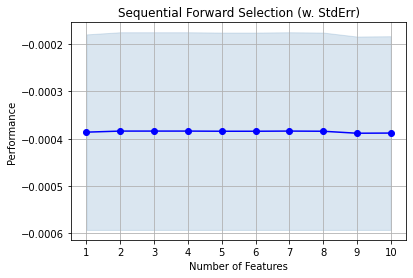

In [ ]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
print(f"Best score achieved: {sfs.k_score_},Feature's ids: {sfs.k_feature_idx_},Feature's names: {sfs.k_feature_names_} ")

Best score achieved: -0.00038800193334020256,Feature's ids: (57, 59, 60, 62, 64, 141, 143, 144, 147, 148),Feature's names: ('electricity_price_residential', 'electricity_price_industrial', 'electricity_price_transportation', 'electricity_consume_residential', 'electricity_consume_industrial', 'incentive_nonresidential_state_level', 'feedin_tariff', 'cooperate_tax', 'rebate', 'avg_electricity_retail_rate') 


### 3.Embedded Methods
- 利用Training中間model的某種資訊，來當作feature selection的依據，而model會在training過程中自動的使用重要的feature，像是LASSO，在training的過程中因應演算法某些feature對應的權重會變成0，因此在training跟prediction的時候這些feature會直接被忽略。

[lasso plot](https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/)

In [ ]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1,random_state=0)
lasso.fit(X_train, Y_train)
# Make predictions using the testing set
lasso_pred = lasso.predict(X_test)
metrics(Y_test,lasso_pred)

r-squared: -0.001368089927300531%
---------------------------------------
root mean squared error: 0.022796255752949756


In [ ]:
accu_rate(Y_test,lasso_pred)

when threshold 0.01 accuracy rate: 6.089872568745808%
when threshold 0.05 accuracy rate: 88.29644533869886%
when threshold 0.1 accuracy rate: 93.1120053655265%


In [ ]:
lasso <- glmnet(X.train, Y.train, alpha=1) #, family="gaussian"
#train = sample(seq(length(y)),70,replace=FALSE)
#fit1 = glmnet(x[train,], y[train])
#assess.glmnet(fit1, newx = x[-train,], newy = y[-train])
#preds = predict(fit1, newx = x[-train, ], s = c(1, 0.25))
#assess.glmnet(preds, newy = y[-train], family = "gaussian")
#fit1c = cv.glmnet(x, y, keep = TRUE)
#fit1a = assess.glmnet(fit1c$fit.preval, newy=y,family="gaussian") plot(fit1c$lambda, log="x",fit1a$mae,xlab="Log Lambda",ylab="Mean Absolute Error") abline(v=fit1c$lambda.min, lty=2, col="red")

AttributeError: ignored

In [ ]:
import glmnet
x = X_test
y = Y_test
fit1 = glmnet(x, y)
#mod = cv.glmnet(x, y, alpha=0.1)

TypeError: ignored

### 4.主成分分析(PCA)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=10)
X_pca = pca.fit(X)
# summarize components
print('Explained Variance:{}'.format(X_pca.explained_variance_ratio_))
print('Explained Cum_Variance:{}'.format(np.cumsum(X_pca.explained_variance_ratio_)))

Explained Variance:[0.30893915 0.1621527  0.07122882 0.05579959 0.05115451 0.03741928
 0.03006404 0.02440475 0.02312136 0.01760863]
Explained Cum_Variance:[0.30893915 0.47109185 0.54232067 0.59812026 0.64927477 0.68669406
 0.71675809 0.74116284 0.7642842  0.78189284]


In [ ]:
n_pcs= X_pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(X_pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

df = pd.DataFrame(dic.items(),columns=['PCA_num','Features name'])
df

,PCA_num,Features name
0,PC0,electricity_price_commercial
1,PC1,frost_days
2,PC2,race_white_rate
3,PC3,property_tax
4,PC4,heating_fuel_gas_rate
5,PC5,electricity_consume_industrial
6,PC6,property_tax
7,PC7,relative_humidity
8,PC8,relative_humidity
9,PC9,diversity


### 5. Feature Importance
- XGBoost
- RF

[15:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


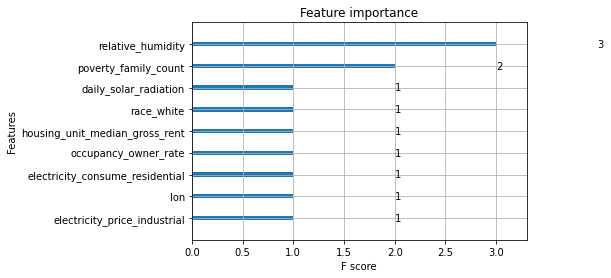

In [ ]:
import xgboost as xgb
dmatrix = xgb.DMatrix(X,Y) #決策樹
# Create the parameter dictionary: params
params = {'objective':'reg:linear','max_depth':'2'}
# Train the model: xg_reg
xg_reg = xgb.train(dtrain=dmatrix,params=params,num_boost_round=4)
# Plot the feature importances
xgb.plot_importance(xg_reg)

- https://explained.ai/rf-importance/

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=4,max_features=4,max_leaf_nodes=4)
rf.fit(X, Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features=4, max_leaf_nodes=4,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
def dropcol_importances(rf, X_train, y_train):
    baseline = rf.oob_score_
    imp = []
    for col in X_train.columns:
        X = X_train.drop(col, axis=1)
        rf_ = clone(rf)
        rf_.random_state = 999
        rf_.fit(X, y_train)
        o = rf_.oob_score_
        imp.append(baseline - o)
    imp = np.array(imp)
    I = pd.DataFrame(
            data={'Feature':X_train.columns,
                  'Importance':imp})
    I = I.set_index('Feature')
    I = I.sort_values('Importance', ascending=True)
    return I

In [ ]:
dropcol_importances(rf, X_train, Y_train)

AttributeError: ignored

Text(0.5, 0, 'Random Forest Feature Importance')

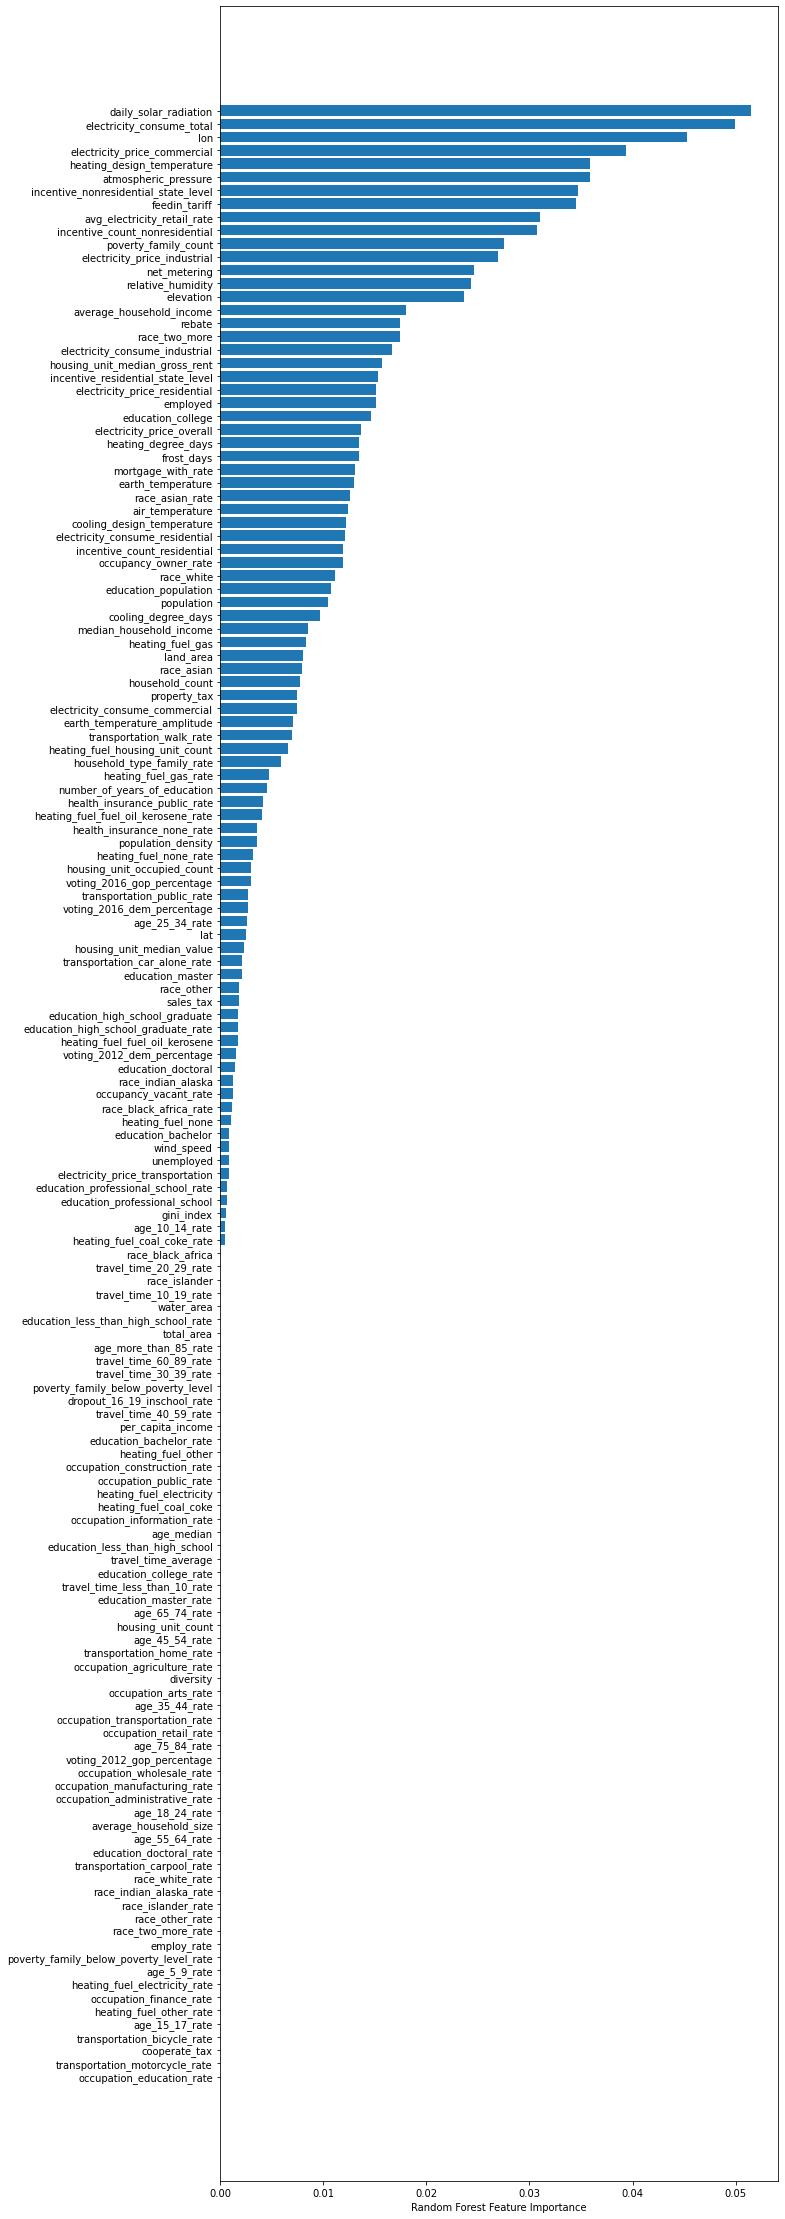

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
fig= plt.subplots(figsize=(10,40)) 
plt.barh(df_x.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# 特徵工程後預測性能

In [ ]:
feature_list=['electricity_price_industrial', 'electricity_consume_residential', 'incentive_nonresidential_state_level', 'feedin_tariff',
             'daily_solar_radiation', 'lon', 'electricity_price_commercial', 'relative_humidity','race_white','property_tax']
df_x = df_area[feature_list]

In [ ]:
X = df_x
Y = df_area['total_panel_area_residential']
print(X.shape)
print(Y.shape)

(45179, 10)
(45179,)


In [ ]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.33, random_state=101)
print(X_train1.shape)
print(X_test1.shape)
print(Y_train1.shape)
print(Y_test1.shape)

(30269, 10)
(14910, 10)
(30269,)
(14910,)


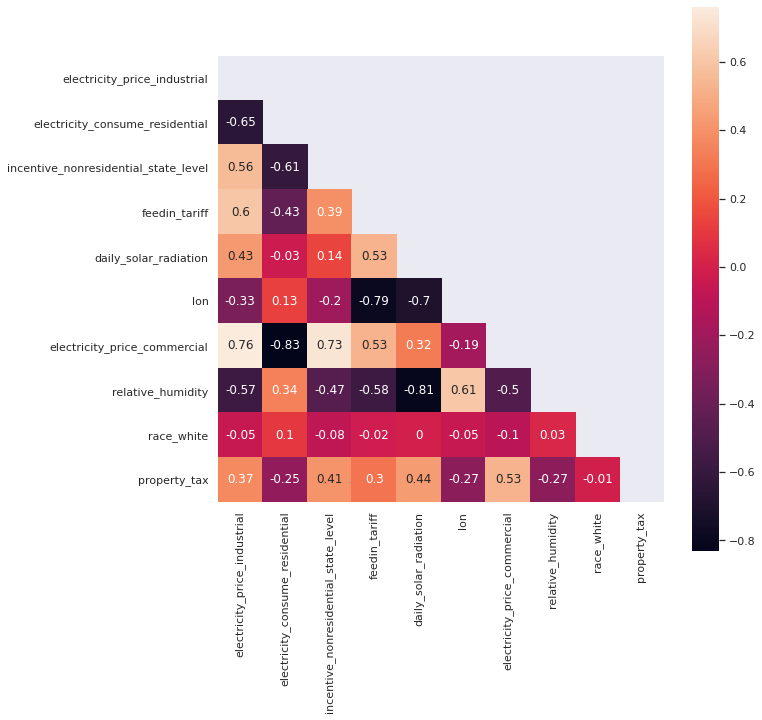

In [ ]:
#看feature間heatmap，目前83 feature 太多，看不出來
df_features=df_x.astype(np.float32) # 需要先將資料型態統一轉為float才能計算corr
# compute the pair wise correlation for all columns  
correlation_matrix = df_features.corr(method='pearson').round(2)
 
# Steps to remove redundant values
mask = np.zeros_like(df_features.corr())
mask[np.triu_indices_from(mask)] = True

# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.set(rc={'figure.figsize': (10,10)})
sns.heatmap(df_features.corr().round(2), square=True, annot=True, mask=mask);

# Extra Trees

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
extra_tree1 = ExtraTreeRegressor()
bag1 = BaggingRegressor(extra_tree1, random_state=0).fit(X_train1, Y_train1)

In [ ]:
y_bagtrain1_pred=bag1.predict(X_train1)
y_bagtrain1_pred

array([0.20013821, 0.20129027, 0.20009385, ..., 0.20016301, 0.20023959,
       0.20018487])

In [ ]:
metrics(Y_train1,y_bagtrain1_pred)

r-squared: 90.97192919086476%
---------------------------------------
root mean squared error: 0.006681037644325477


In [ ]:
accu_rate(Y_train1,y_bagtrain1_pred)

when threshold 0.01 accuracy rate: 79.63593115068221%
when threshold 0.05 accuracy rate: 95.47061349895934%
when threshold 0.1 accuracy rate: 98.68512339357099%


In [ ]:
y_bagtest1_pred=bag1.predict(X_test1)
y_bagtest1_pred

array([0.20014368, 0.20030454, 0.20021773, ..., 0.20120989, 0.21463209,
       0.21676213])

In [ ]:
metrics(Y_test1,y_bagtest1_pred)

r-squared: 51.12126677588007%
---------------------------------------
root mean squared error: 0.015937511858182485


In [ ]:
accu_rate(Y_test1,y_bagtest1_pred)

when threshold 0.01 accuracy rate: 64.88262910798122%
when threshold 0.05 accuracy rate: 86.3514419852448%
when threshold 0.1 accuracy rate: 93.72904091213951%


# XGBoost

In [ ]:
from xgboost import XGBRegressor
xgbc1 = XGBRegressor(objective ='reg:linear', verbosity = 0, random_state=42)
xgbc1.fit(X_train1, Y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [ ]:
y_xgbctrain1_pred=xgbc1.predict(X_train1)
y_xgbctrain1_pred

array([0.20057815, 0.20150813, 0.20018202, ..., 0.20126483, 0.20126483,
       0.20142019], dtype=float32)

In [ ]:
metrics(Y_train1,y_xgbctrain1_pred)

r-squared: 58.12205614898542%
---------------------------------------
root mean squared error: 0.01438928172319456


In [ ]:
accu_rate(Y_train1,y_xgbctrain1_pred)

when threshold 0.01 accuracy rate: 60.98979153589481%
when threshold 0.05 accuracy rate: 86.02861012917506%
when threshold 0.1 accuracy rate: 94.12600350193267%


In [ ]:
y_xgbctest1_pred=xgbc1.predict(X_test1)
y_xgbctest1_pred

array([0.2011916 , 0.20142019, 0.20071957, ..., 0.20148492, 0.2030895 ,
       0.2171073 ], dtype=float32)

In [ ]:
metrics(Y_test1,y_xgbctest1_pred)

r-squared: 53.02266271173639%
---------------------------------------
root mean squared error: 0.01562445035538637


In [ ]:
accu_rate(Y_test1,y_xgbctest1_pred)

when threshold 0.01 accuracy rate: 60.992622401073106%
when threshold 0.05 accuracy rate: 86.06975184439973%
when threshold 0.1 accuracy rate: 93.8430583501006%


# DNN

In [ ]:
from sklearn.neural_network import MLPRegressor

dnn1=MLPRegressor(hidden_layer_sizes=(80,80,80),  #預設值1層,數目100
         activation='relu',  #{'identity'無，'logistic'為sigmoid，'tanh'，'relu'}，預設='relu'
         solver='adam',   #{'lbfgs'牛頓，'sgd'隨機梯度，'adam'隨機梯度優化}，預設='adam'
         batch_size=100,  #'auto'為min(200～樣本數)
         learning_rate='constant',  #constant固定'，'invscaling隨著時間遞減'，'adaptive誤差減少時不改變'}，預設 ='constant' 
         learning_rate_init=0.01, #優化器為sgd、adam使用
         power_t=0.5,     # 優化器為sgd，則可以設定強化學習率   
         max_iter=1000,    #訓練次數
         shuffle=True,    #隨機設定權重
         random_state=1,   #隨機的基礎值
         momentum=0.9)

In [ ]:
dnn1.fit(X_train1, Y_train1)
y_dnntrain_pred1=dnn1.predict(X_train1)
y_dnntrain_pred1

array([0.20099711, 0.2011675 , 0.20071854, ..., 0.2016929 , 0.20132666,
       0.20154919])

In [ ]:
metrics(Y_train1,y_dnntrain_pred1)

r-squared: 25.9115171718175%
---------------------------------------
root mean squared error: 0.019139112321467932


In [ ]:
accu_rate(Y_train1,y_dnntrain_pred1)

when threshold 0.01 accuracy rate: 55.10588390762826%
when threshold 0.05 accuracy rate: 77.0226964881562%
when threshold 0.1 accuracy rate: 84.65426674155077%


In [ ]:
dnn1.fit(X_test1, Y_test1)
y_dnntest_pred1=dnn1.predict(X_test1)
y_dnntest_pred1

array([0.19803681, 0.1988343 , 0.19812821, ..., 0.19798589, 0.19885278,
       0.22797854])

In [ ]:
metrics(Y_test1,y_dnntest_pred1)

r-squared: 23.967458968509657%
---------------------------------------
root mean squared error: 0.01987743319142485


In [ ]:
accu_rate(Y_test1,y_dnntest_pred1)

when threshold 0.01 accuracy rate: 20.469483568075116%
when threshold 0.05 accuracy rate: 81.140174379611%
when threshold 0.1 accuracy rate: 92.00536552649228%


# 儲存model

In [ ]:
from sklearn.externals import joblib
model_dir = '/content/drive/MyDrive/Colab Notebooks/models/'
# Save the model as a pickle in a file
joblib.dump(bag1, f'{model_dir}'+'Deepsolar_Bagging_model.pkl')

['/content/drive/MyDrive/Colab Notebooks/models/Deepsolar_Bagging_model.pkl']

In [ ]:
# 確認模型是否載入成功
try:
    model = joblib.load('/content/drive/MyDrive/Colab Notebooks/models/Deepsolar_Bagging_model.pkl')
    print("載入模型成功!繼續訓練模型")
except :
    print("載入模型失敗!開始訓練一個新模型")

載入模型成功!繼續訓練模型


In [ ]:
# Use the loaded model to make predictions
model.predict(X_test)

array([0.29376602, 0.21338835, 0.31002462, ..., 0.30987658, 0.26432344,
       0.31524033])

In [ ]:
y = (y_pred-0.2)*40380.099851/0.6
y

6310.468750384772